In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/Kail4eK/ml_edu/master/datasets/Pokemon.csv')
df.head(5)

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [3]:
df.nunique()

#             721
Name          800
Type 1         18
Type 2         18
Total         200
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64

In [4]:
df.drop(columns=['#', 'Name'], inplace=True)

In [5]:
import matplotlib as mpl

TEXT_COLOR = 'black'

mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.labelcolor'] = TEXT_COLOR
mpl.rcParams['xtick.color'] = TEXT_COLOR
mpl.rcParams['ytick.color'] = TEXT_COLOR

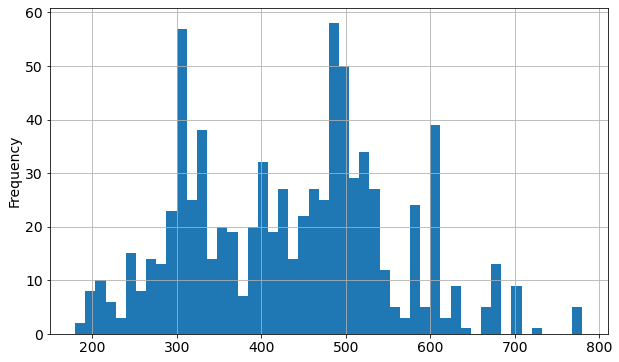

In [6]:
# Отображение гистограммы частот значений признака
# Отобразим данные в 50ти бинах (колонках гистограммы)
df['Total'].plot(kind='hist', bins=50)
plt.grid(True)
plt.show()

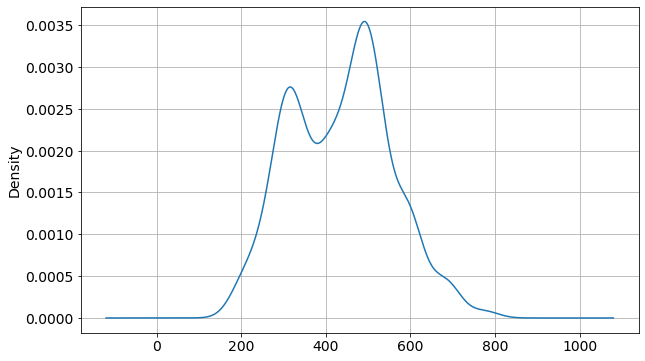

In [7]:
# Отображение данных в виде KDE (Kernel Density Estimation)
# Так называется плотность распределения переменной
df['Total'].plot(kind='kde')
plt.grid(True)
plt.show()

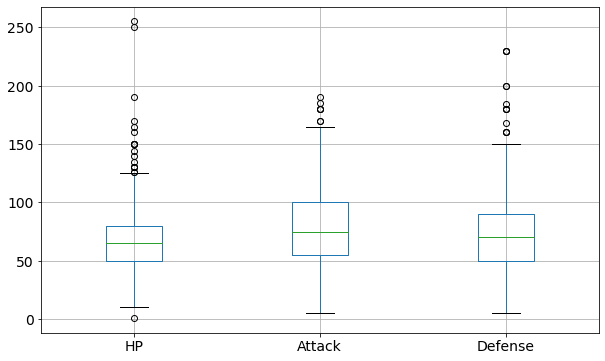

In [8]:
# Отображение трех признаков в виде "ящиков с усами"
df[['HP', 'Attack', 'Defense']].plot(kind='box')
plt.grid(True)
plt.show()

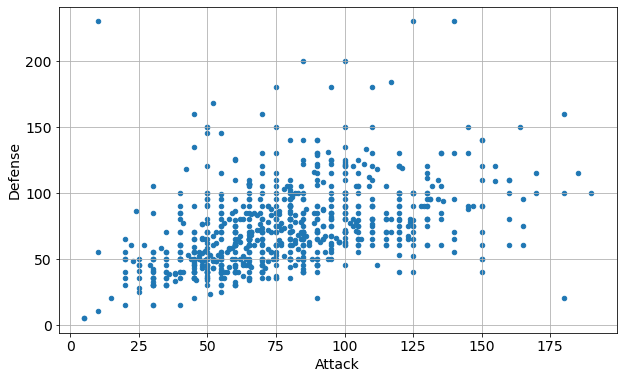

In [9]:
# Отображение точечного графика
# Задаем признаки, значения которых будет отображено по осям
df.plot(kind='scatter', x='Attack', y='Defense')
plt.grid(True)
plt.show()

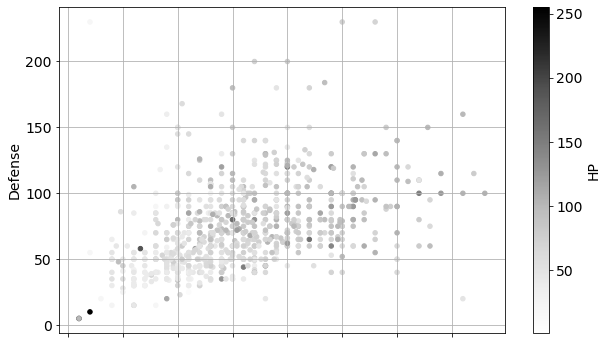

In [10]:
# Также, можно добавить третий признак на точечный график в виде цвета
df.plot(kind='scatter', x='Attack', y='Defense', c='HP')
plt.grid(True)
plt.show()

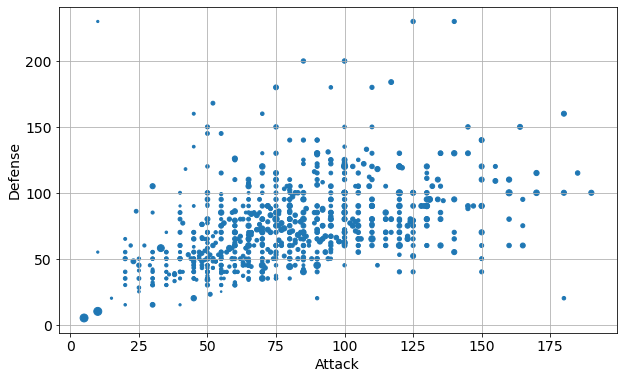

In [11]:
# Или в виде размера
df.plot(kind='scatter', x='Attack', y='Defense', s=df['HP']/4)
plt.grid(True)
plt.show()

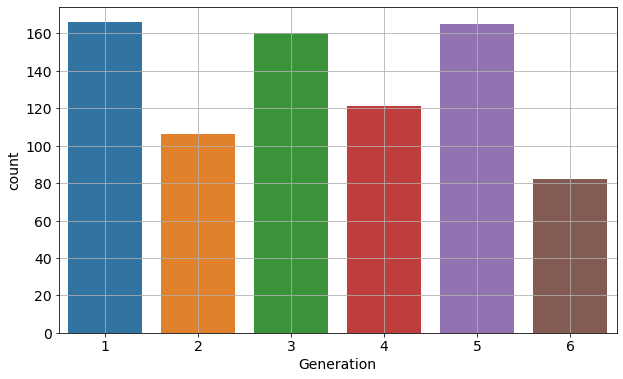

In [12]:
# Первый график - график количества значений
# Такой график отображает количества уникальных значений
# Хорошо подходит для категориальных признаков
sns.countplot(x='Generation', data=df)
plt.grid(True)
plt.show()

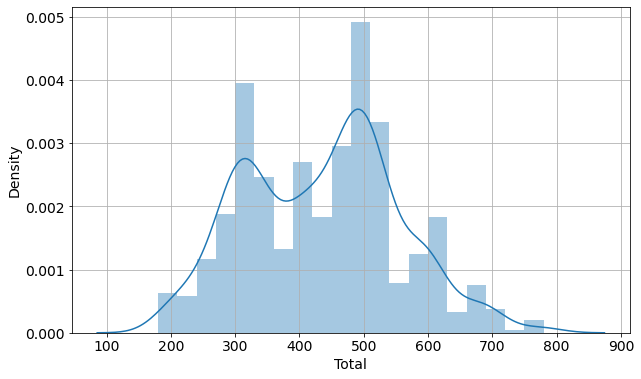

In [13]:
# Отображение графика простого распределения графика распределения признака
sns.distplot(df['Total'], bins=20)
plt.grid(True)
plt.show()

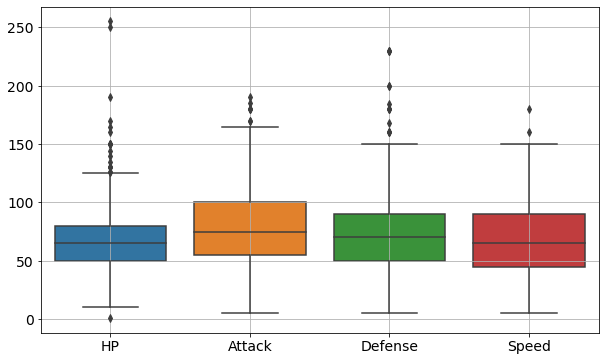

In [14]:
# Отображение графика "ящик с усами"
sns.boxplot(data=df[['HP', 'Attack', 'Defense', 'Speed']]);
plt.grid(True)
plt.show()

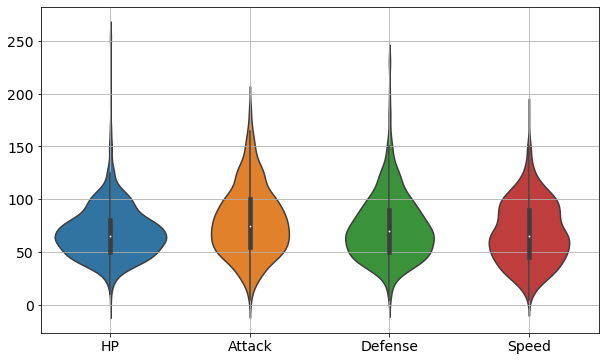

In [15]:
sns.violinplot(data=df[['HP', 'Attack', 'Defense', 'Speed']])
plt.grid(True)
plt.show()

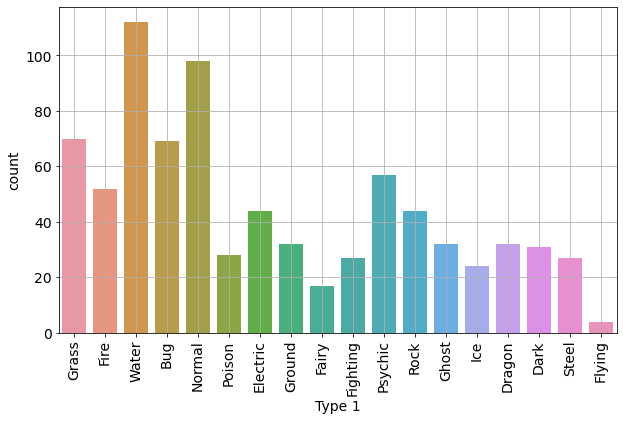

In [18]:
# Task 1 
# TODO - отобразить график количеств типов
# Для удобочитаемости изучите, как повернуть подписи
#   функцией `plt.xticks()`
sns.countplot(x='Type 1', data=df)
plt.grid(True)
plt.xticks(rotation='90')
plt.show()

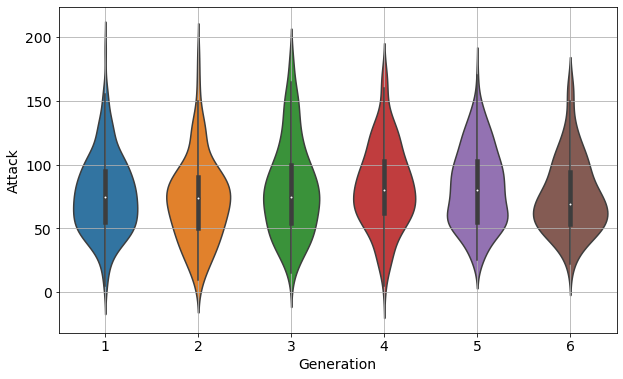

In [19]:
# График скрипки, но мы уже не просто отображаем отдельную переменную 
#   в каждой скрипке, а смотрим на распределение показателей атаки 
#   в зависимости от поколения
sns.violinplot(x='Generation', y='Attack', data=df)
plt.grid(True)
plt.show()

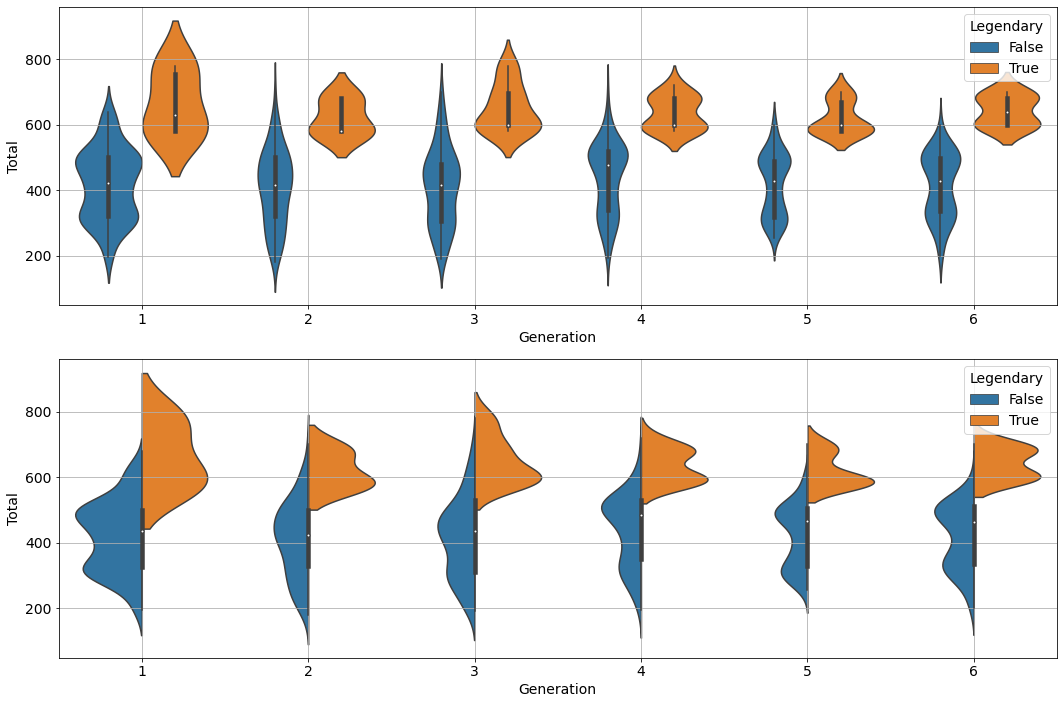

In [20]:
# Также, можем добавить отображение в зависимости еще и от флага легендарности
# split - для отображения в виде половинок (иначе будут отдельные графики)
# ax - для задания зоны отображения
fig, ax = plt.subplots(nrows=2, ncols=1, squeeze=False, figsize=[15, 10])

sns.violinplot(x='Generation', y='Total', hue='Legendary', data=df, ax=ax[0,0])
ax[0,0].grid(True)

sns.violinplot(x='Generation', y='Total', hue='Legendary', data=df, split=True, ax=ax[1,0])
ax[1,0].grid(True)

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Generation', ylabel='Attack'>

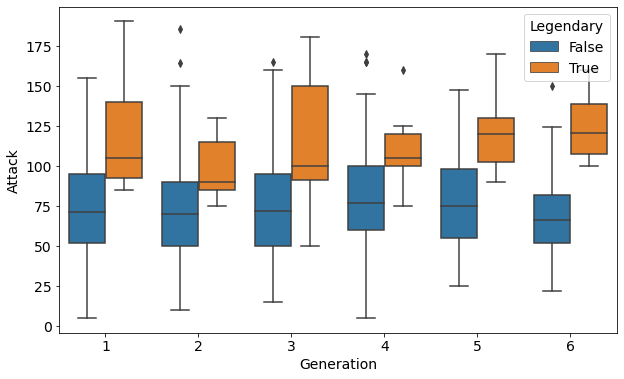

In [21]:
# Task 2
sns.boxplot(x='Generation', y='Attack', hue='Legendary', data=df)

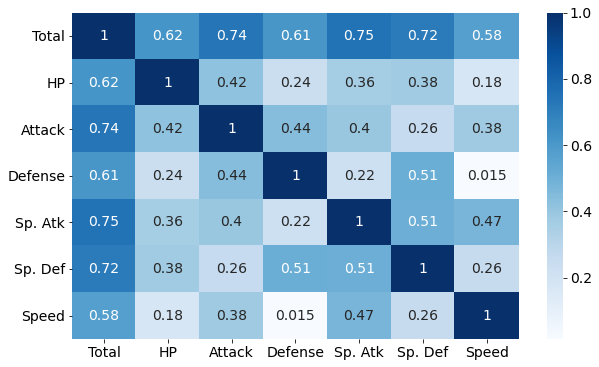

In [22]:
corr_mtrx = df[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].corr()
# annot - добавляем надписи на график
# cmap - устанавливаем цветовую палитру
sns.heatmap(corr_mtrx, annot=True, cmap='Blues')
plt.show()

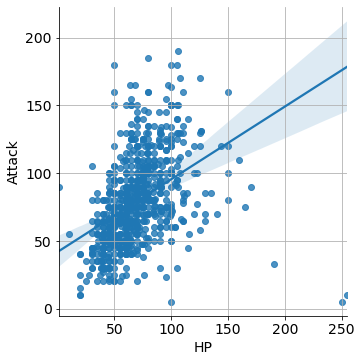

In [23]:
# График регрессионной зависимости в виде точечного графика
#   fit_reg - строится прямая по методу наименьших квадратов
sns.lmplot(x='HP', y='Attack', data=df, fit_reg=True)
plt.grid(True)
plt.show()

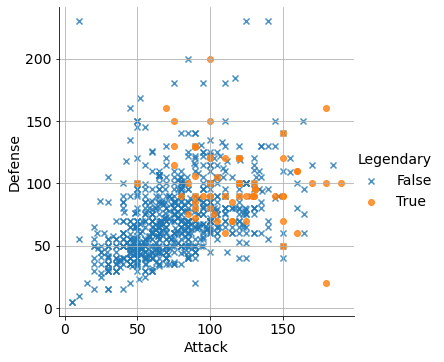

In [24]:
# Task 3
sns.lmplot(x='Attack', y='Defense', data=df, hue='Legendary', fit_reg=False, markers=['x', 'o'])
plt.grid(True)
plt.show()

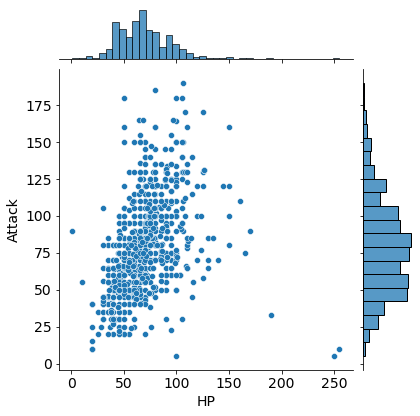

In [25]:
# Оторажение не только точечного графика, но и распределений каждого графика
sns.jointplot(x="HP", y="Attack", data=df);
plt.show()

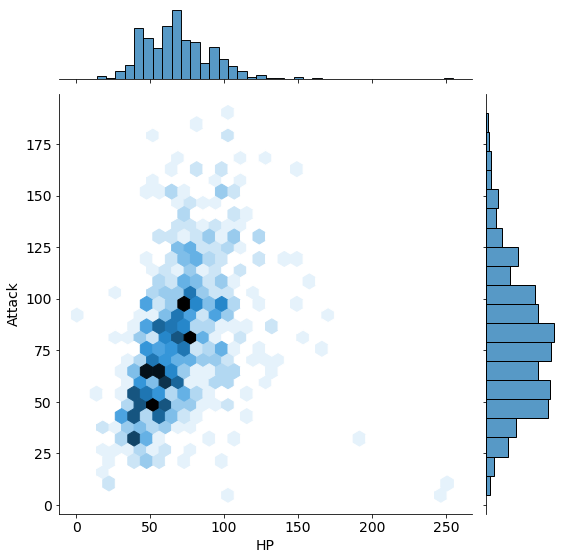

In [27]:
# Точки часто сливаются друг с другом - 
#   для сгруппированного отображения выведем в виде шестиугольников
sns.jointplot(x="HP", y="Attack", data=df, kind='hex', height=8.0)
plt.show()

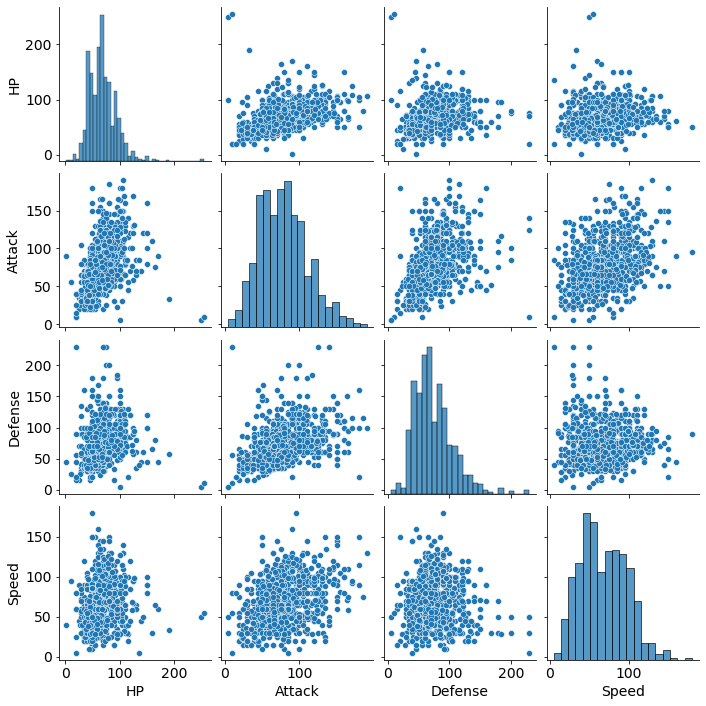

In [28]:
# Полезный график визуализации зависимостей сразу нескольких признаков
# По диагонали распределение самих признаков
# В остальных ячейках - зависимости признаков одной от другой
sns.pairplot(data=df, vars=['HP', 'Attack', 'Defense', 'Speed'])
plt.show()

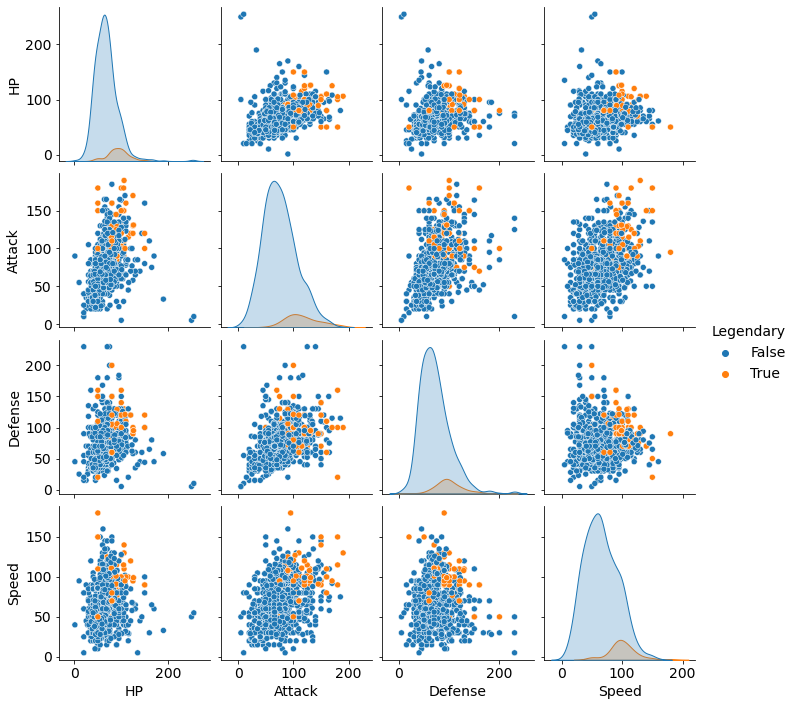

In [29]:
# Аналогично, можно задать отображение групп в виде цветов
sns.pairplot(data=df, vars=['HP', 'Attack', 'Defense', 'Speed'], hue='Legendary')
plt.show()

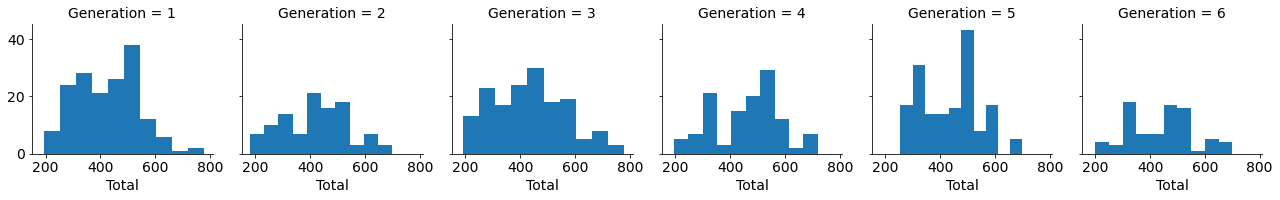

In [30]:
# FacetGrid - класс для построения разметки в зависимости 
#   от уникальных значений в данных 
g = sns.FacetGrid(df, col="Generation")
# После того, как разметка построена - делаем отображение 
#   путем задания типов графиков и самих данных
g = g.map(plt.hist, 'Total')
plt.show()

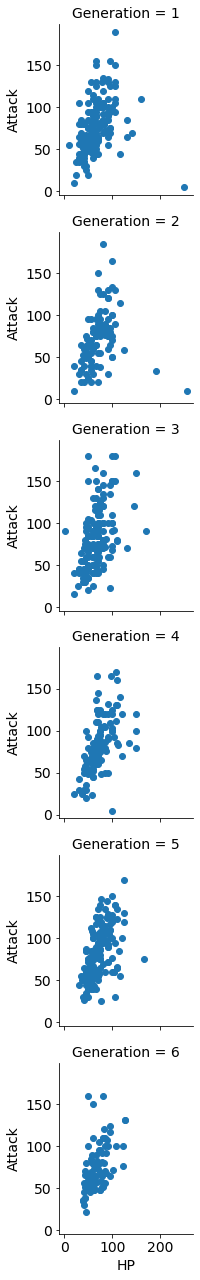

In [31]:
# Или точечный график в колонку
g = sns.FacetGrid(df, row="Generation")
g = g.map(plt.scatter, 'HP', 'Attack')
plt.show()

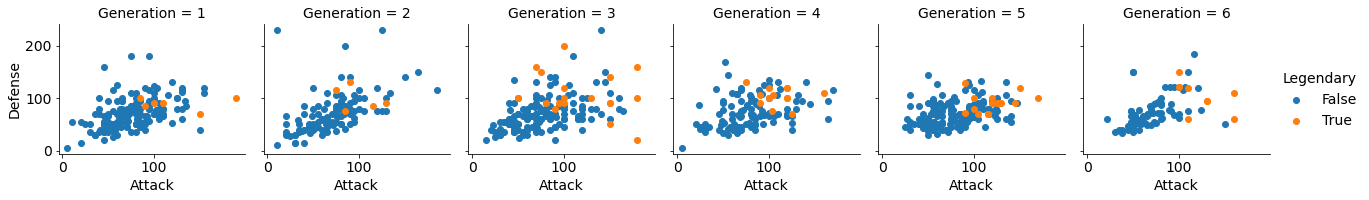

In [32]:
# Task 3
g = sns.FacetGrid(df, col="Generation", hue='Legendary')
g = g.map(plt.scatter, 'Attack', 'Defense').add_legend()
plt.show()